## EDA 範例

In [33]:
import numpy as np # linear algebraa
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import random
import warnings
import scipy
from scipy.stats import boxcox, boxcox_normmax
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
warnings.filterwarnings('ignore')
import plotly.figure_factory as ff

In [34]:
df = pd.read_csv('train.csv')
df.drop(['MiscVal'], axis = 1, inplace = True)

In [35]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,12,2008,WD,Normal,250000


### Step1. Find Null Varialbes

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

object的遺失值都補上"No"

In [38]:
meaningfulNA = ['Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 
 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']
df[meaningfulNA] = df[meaningfulNA].fillna('No')

In [39]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,No,Reg,Lvl,AllPub,...,0,0,No,No,No,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,No,Reg,Lvl,AllPub,...,0,0,No,No,No,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,No,IR1,Lvl,AllPub,...,0,0,No,No,No,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,No,IR1,Lvl,AllPub,...,0,0,No,No,No,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,No,IR1,Lvl,AllPub,...,0,0,No,No,No,12,2008,WD,Normal,250000


#### 依型態劃分欄位

In [40]:
intVar = df.select_dtypes(include=['int64']).columns.tolist()
floatVar = df.select_dtypes(include=['float']).columns.tolist()
objectVar = df.select_dtypes(include=['object']).columns.tolist()

### 畫出每個欄位空資料的情況

In [ ]:
nullIndex = df.isnull().any().index[df.isnull().any()]
nullTrain = df.loc[:, nullIndex].copy()
for col in nullTrain.columns:
    nullPos = nullTrain[col].isnull()
    nullTrain.loc[~nullPos, col] = 'Exist'
    nullTrain.loc[nullPos, col] = 'Null'

nullTrain = nullTrain.apply(lambda x: pd.Series.value_counts(x)).T
nullTrain = nullTrain.sort_values('Exist')

In [43]:
trace1 = go.Bar(
    x = nullTrain['Exist'],
    y = nullTrain.index,
    name = 'Exist',
    orientation = 'h',
    marker = dict(
        color = 'rgba(246, 78, 139, 0.6)',
        line = dict(
            color = 'rgba(246, 78, 139, 1.0)',
            width = 3)
    ))
trace2 = go.Bar(
    x = nullTrain['Null'],
    y = nullTrain.index,
    name = 'Null',
    orientation = 'h',
    marker = dict(
        color = 'rgba(58, 71, 80, 0.6)',
        line = dict(
            color = 'rgba(58, 71, 80, 1.0)',
            width = 3)
    )
)

data = [trace1, trace2]
layout1 = go.Layout(
    width = 800,
    height = 400,
    barmode = 'stack',
    title = 'Null Value BarPlot'
    )
fig = go.Figure(data = data, layout = layout1)

#print((df_train.isnull().sum()[df_train.isnull().sum() != 0]) / df_train.shape[0])
py.iplot(fig)
indexList = df.index
print('Number of Missing Index Sum (MaxVnrType, MasVnrARea, Electrical) : ', sum(indexList[df[['MasVnrType', 'MasVnrArea', 'Electrical']].isnull().sum(axis=1)]))
df = df.loc[df[['Electrical', 'MasVnrArea', 'MasVnrType']].isnull().sum(axis=1) == 0, :]

print('Correlation Between GarageYrBlt and YearBlt: ', df[['GarageYrBlt', 'YearBuilt']].corr().loc['GarageYrBlt', 'YearBuilt'].round(2))
val = round(max(df.corr().loc['LotFrontage', :].drop('LotFrontage')),2)
print('Max Correlation of LotFrontage : ', val)
print('-- Linear Imputation : LotFrontage-- ')
from sklearn import linear_model
dfImpute = df.loc[:, ['1stFlrSF', 'LotArea', 'LotFrontage']].copy()
testIx = dfImpute.loc[:,'LotFrontage'].isnull()
dfTrain = dfImpute.loc[~testIx, :]
dfTest = dfImpute.loc[testIx, :]
lr = linear_model.LinearRegression()
lr.fit(dfTrain.loc[:, ['1stFlrSF', 'LotArea', 'LotArea']], dfTrain.loc[:, 'LotFrontage'])
lrImpute = lr.predict(dfTest.loc[:, ['1stFlrSF', 'LotArea', 'LotArea']])

Number of Missing Index Sum (MaxVnrType, MasVnrARea, Electrical) :  17
Correlation Between GarageYrBlt and YearBlt:  0.82
Max Correlation of LotFrontage :  0.46
-- Linear Imputation : LotFrontage-- 


In [44]:
from collections import Counter, defaultdict
def checkOutlier(df, m = 4):
    uniOutlier = dict().fromkeys(df.columns, None)
    outSample = abs(df - df.mean()) > 4 * df.std()
    outSum = (abs(df - df.mean()) > 4 * df.std()).sum()
    for key in uniOutlier.keys():
        uniOutlier[key] = set(outSample.index[outSample.loc[:, key]])
    outportion = outSum / df.shape[0]
    #print("No outlier Vars: " ,outSum.index[outportion == 0].tolist())
    #print("Outlier Portion")
    #print(outportion[outportion != 0].index.tolist())
    #print(outportion[outportion != 0].values.tolist())
    outportion = outportion[outportion != 0].sort_values()
    outlierLst = outportion.index.tolist()
    return uniOutlier, outlierLst

from collections import Counter
def outlierCounter(outlierDict, exceptionLst = ['SalePrice']):
    inter = Counter()
    name = defaultdict(list)
    coreKey = set(outlierDict.keys()).difference(exceptionLst)
    for key in coreKey:
        value = outlierDict[key]
        for val in value:
            inter[val] += 1
            name[val].append(key)
    res = pd.DataFrame([inter, name], index = ['count', 'variable']).T
    res = res.sort_values('count', ascending = False)
    return res

from scipy.stats import multivariate_normal
def bivarCI(dfNum, y = 'SalePrice', outer = 10, z_score = 0.00006, cols = 2):
    
    colNum = dfNum.shape[1]
    row, col = divmod(colNum-1, cols)
    if row == 1 and col == 0: row += 1
    if col != 0: row += 1
    
    
    z_under = z_score * 0.98
    z_upper = z_score * 1.02
    
    biOutlier = dict().fromkeys(dfNum.columns, None)
    #f, axes = plt.subplots(row, cols, figsize = (4*cols, 4*row))
    #f.suptitle('Bivaraite CI', fontsize = 12)
    for ix, var1 in enumerate(dfNum.columns):
        if var1 == y: break
        r,c = divmod(ix, cols)
        dfPart = dfNum.loc[:, [var1,y]]
        dfPart = dfPart[~dfPart.isnull()].copy()
        dfPart = dfPart.loc[dfPart.loc[:, var1] != 0,:]
        dfPart = (dfPart - dfPart.mean()) / dfPart.std()
        F, X, Y, posProb = bivarConverter(dfPart, outer, z_under, z_upper, N = 700)
        #axes[r,c].contourf(X, Y, posProb)
        #axes[r,c].scatter(dfPart.loc[:, var1], dfPart.loc[:, y], alpha = 1)
        #axes[r,c].set_title('Bivaraite CI ' + var1)
        dfPartProb = F.pdf(dfPart.values)
        outIndex = dfPart.index[dfPartProb < z_score]
        biOutlier[var1] = set(outIndex.tolist())
    #f.tight_layout(rect = [0, 0.03, 1, 0.95])
    #plt.show()
    
    return biOutlier

def bivarConverter(df, outer, z_under, z_upper, N = 500):
    x_init, y_init = df.min() - outer
    x_end, y_end = df.max() + outer
    X = np.linspace(x_init, x_end, N)
    Y = np.linspace(y_init, y_end, N)
    X, Y = np.meshgrid(X, Y)
    pos = np.empty(X.shape + (2,))
    pos[:,:,0] = X
    pos[:,:,1] = Y
    F = multivariate_normal(mean=df.mean().values, cov=df.corr().values)
    posProb = F.pdf(pos)
    posProb[(z_under < posProb) & (posProb < z_upper)] = 1
    posProb[(z_under > posProb) | (posProb < z_upper)] = 0
       
    return F , X, Y, posProb

### 查看資料離群值的情況

In [45]:
cols = ['GrLivArea', 'LotArea', '1stFlrSF', 'TotalBsmtSF', 'SalePrice']
uniOutlier, outlierList = checkOutlier(df.loc[:, cols])
uniOut = outlierCounter(uniOutlier, ['SalePrice'])
biOutlier = bivarCI(df.loc[:, cols], outer = 2, z_score = 0.00006,  cols = 4)
biOut = outlierCounter(biOutlier, ['SalePrice', ])
totOut = uniOut.join(biOut, lsuffix='_uni', rsuffix='_bi')
print('Top 3 Outlier')
totOut.head(3)

Top 3 Outlier


,count_uni,variable_uni,count_bi,variable_bi
1298,4,"[LotArea, GrLivArea, 1stFlrSF, TotalBsmtSF]",4,"[LotArea, GrLivArea, 1stFlrSF, TotalBsmtSF]"
523,3,"[GrLivArea, 1stFlrSF, TotalBsmtSF]",3,"[GrLivArea, 1stFlrSF, TotalBsmtSF]"
496,2,"[1stFlrSF, TotalBsmtSF]",2,"[1stFlrSF, TotalBsmtSF]"


In [46]:
outIndex = [1298, 769, 706, 249, 313, 457, 451, 384, 335, 1396]
outIndex2 = [1298, 523, 496, 440, 332]
outpos =  df.index.isin(outIndex)
inpos = ~outpos
outpos2 = df.index.isin(outIndex2)
inpos2 = ~outpos2

trace1 = go.Scatter(
    x = df.loc[inpos,'LotArea'],
    y = df.loc[inpos,'SalePrice'],
    mode = 'markers',
    marker = dict(
        color='rgba(217, 217, 217, 1.0)',
    ),
    text = 'Inner'
)
trace2 =  go.Scatter(
    x = df.loc[outIndex,'LotArea'],
    y = df.loc[outIndex, 'SalePrice'],
    mode = 'markers',
    marker = dict(
        color= 'rgba(156, 165, 196, 0.95)',
    ),
    text = 'Outlier'
)

trace3 = go.Scatter(
    x = df.loc[inpos2, 'LotArea'],
    y = df.loc[inpos2,'TotalBsmtSF'],
    mode = 'markers',
    marker = dict(
        color='rgba(217, 217, 217, 1.0)',
    ),
    xaxis = 'x2',
    yaxis = 'y2',
    text = 'Inner'
)
trace4 =  go.Scatter(
    x = df.loc[outIndex,'LotArea'],
    y = df.loc[outIndex, 'TotalBsmtSF'],
    mode = 'markers',
    marker = dict(
        color= 'rgba(156, 165, 196, 0.95)',
    ),
    xaxis = 'x2',
    yaxis = 'y2',
    text = 'Outlier'
)

xaxisDict =  dict(
            ticklen = 5,
            showgrid = True,
            zeroline = False,
            showline = False)
yaxisDict = dict(
        showgrid = True,
        zeroline = False,
        ticklen =5,
        gridwidth = 0
    )
data = [trace1, trace2, trace3, trace4]
layout = go.Layout(
    width = 800,
    height = 400,
    title = 'Outlier Detection',
    hovermode = 'closest',
    paper_bgcolor='rgb(254, 247, 234)',
    plot_bgcolor='rgb(254, 247, 234)',
    xaxis1 = xaxisDict,
    yaxis1 = yaxisDict,
    xaxis2 = xaxisDict,
    yaxis2 = yaxisDict,
    showlegend = False
)

fig = go.Figure(data = data, layout = layout)
fig.layout.xaxis1.update({'anchor': 'y1', 'domain' : [0, 0.45], 'title': 'LotArea'})
fig.layout.yaxis1.update({'anchor': 'x1', 'domain': [0, 1], 'title': 'SalePrice'})
fig.layout.xaxis2.update({'anchor': 'y2', 'domain' : [0.65, 1], 'title':'LotArea'})
fig.layout.yaxis2.update({'anchor': 'x2', 'domain': [0, 1], 'title' : 'TotalBsmtSF'})
fig.layout.margin.update({'t':75, 'l':50})

py.iplot(fig)
###
df = df.loc[~df.index.isin(totOut.index),:]
df_raw = df.copy()

<Figure size 432x216 with 0 Axes>

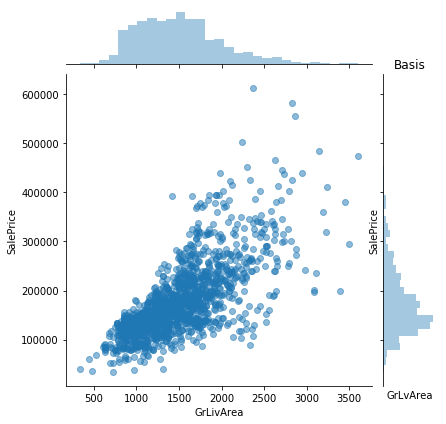

In [47]:
plt.figure(figsize = (6, 3))
sns.jointplot(df.GrLivArea, df.SalePrice, alpha = 0.5)
plt.xlabel('GrLvArea')
plt.ylabel('SalePrice')
plt.title('Basis')
plt.show()